# NPV-MINI_PROJECT

The dataset contains 2 files: deliveries.csv and matches.csv. matches.csv contains details related to the match such 
as location, contesting teams, umpires, results, etc. deliveries.csv is the ball-by-ball data of all 
the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.

### To Do:

1.Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2.Drop any columns that you deem unnecessary for analysis.

In [3]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [2]:
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.drop(['umpire1','umpire2','umpire3','venue'],axis=1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli
632,633,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers
633,634,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques
634,635,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner


3.Answer the following questions. Support your answer with appropriate visualizations.

### 1.How many matches we've got in the dataset?

In [16]:
deliveries['match_id'].nunique()

636

There were totally 636 matches in the dataset

### 2.How many seasons we've got in the dataset?

In [19]:
matches['season'].nunique()

10

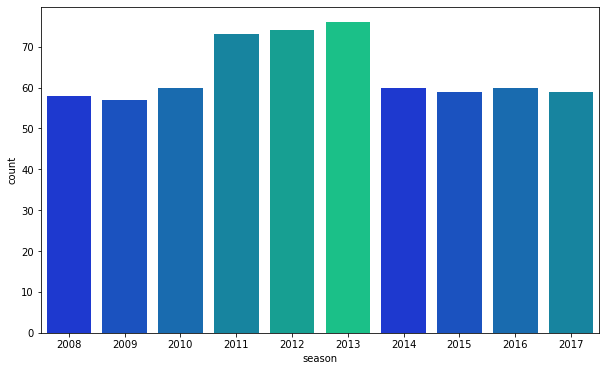

In [6]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('winter'))  
plt.show()

as above , we can infer that there were 10 seasons totally

### 3.Which Team had won by maximum runs?

In [83]:
max_runs=matches.groupby('winner')['win_by_runs'].sum().sort_values()

In [31]:
max_runs.max()

1587

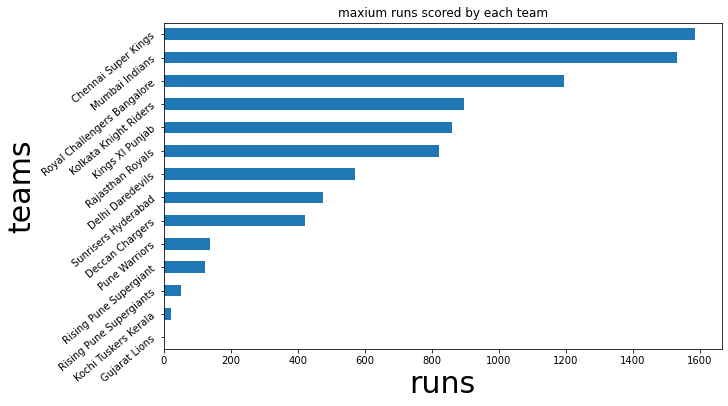

In [84]:
plt.subplots(figsize=(10,6))
max_runs.plot.barh(rot=40)
plt.title('maxium runs scored by each team')
plt.xlabel('runs',fontsize=30)
plt.ylabel('teams',fontsize=30)
plt.show()

The team 'chennai super kings' had won by maximum runs from the dataset above, and 1587 is the total runs taken by them.

### 4.Which Team had won by maximum wicket?

In [81]:
max_wickets=matches.groupby('winner')['win_by_wickets'].sum().sort_values()

In [67]:
max_wickets.max()

291

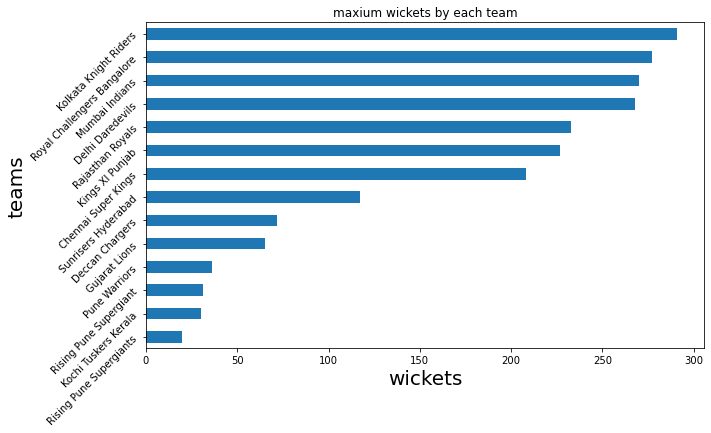

In [87]:
plt.subplots(figsize=(10,6))
max_wickets.plot.barh(rot=45)
plt.title('maxium wickets by each team')
plt.xlabel('wickets',fontsize=20)
plt.ylabel('teams',fontsize=20)
plt.show()

as above data we can infer that the team kolkata knight riders took the maximum wickets.

### 5.Which Team had won by closest Margin (minimum runs)?

In [74]:
matches[(matches['win_by_runs']==matches['win_by_runs'].min()) & (matches['result']=='normal') &s['win_by_wickets']!=0)]['winner']

1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
5              Sunrisers Hyderabad
6                   Mumbai Indians
                  ...             
628        Rising Pune Supergiants
629                  Gujarat Lions
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
634            Sunrisers Hyderabad
Name: winner, Length: 339, dtype: object

In [92]:
min_runs=matches.groupby('winner')['win_by_runs'].sum().sort_values()
min_runs

winner
Gujarat Lions                     1
Kochi Tuskers Kerala             23
Rising Pune Supergiants          53
Rising Pune Supergiant          123
Pune Warriors                   139
Deccan Chargers                 421
Sunrisers Hyderabad             476
Delhi Daredevils                571
Rajasthan Royals                821
Kings XI Punjab                 862
Kolkata Knight Riders           897
Royal Challengers Bangalore    1196
Mumbai Indians                 1532
Chennai Super Kings            1587
Name: win_by_runs, dtype: int64

from the above we can infer that the team Gujarat Lions has taken only 1 run to win .


### 6.Which Team had won by minimum wicket?

In [75]:
matches[(matches['win_by_wickets']==matches['win_by_wickets'].min()) & (matches['result']=='normal') & (matches['win_by_runs']!=0)]['winner']

0              Sunrisers Hyderabad
4      Royal Challengers Bangalore
8                 Delhi Daredevils
13           Kolkata Knight Riders
14                Delhi Daredevils
                  ...             
624        Rising Pune Supergiants
625    Royal Challengers Bangalore
630          Kolkata Knight Riders
633            Sunrisers Hyderabad
635            Sunrisers Hyderabad
Name: winner, Length: 287, dtype: object

In [93]:
min_wickets=matches.groupby('winner')['win_by_wickets'].sum().sort_values()
min_wickets

winner
Rising Pune Supergiants         20
Kochi Tuskers Kerala            30
Rising Pune Supergiant          31
Pune Warriors                   36
Gujarat Lions                   65
Deccan Chargers                 72
Sunrisers Hyderabad            117
Chennai Super Kings            208
Kings XI Punjab                227
Rajasthan Royals               233
Delhi Daredevils               268
Mumbai Indians                 270
Royal Challengers Bangalore    277
Kolkata Knight Riders          291
Name: win_by_wickets, dtype: int64

from the above we can infer that Rising Pune Supergiants  has taken onlyn 20 wickets , which is th lowest compared to other teams.

### 7.Which Season had most number of matches?

In [65]:
seasons=matches.groupby('season')

In [71]:
seasons['id'].count().sort_values(ascending=False).head(1)

season
2013    76
Name: id, dtype: int64

In [78]:
data=matches.groupby('season')['id'].count().sort_values(ascending=False)

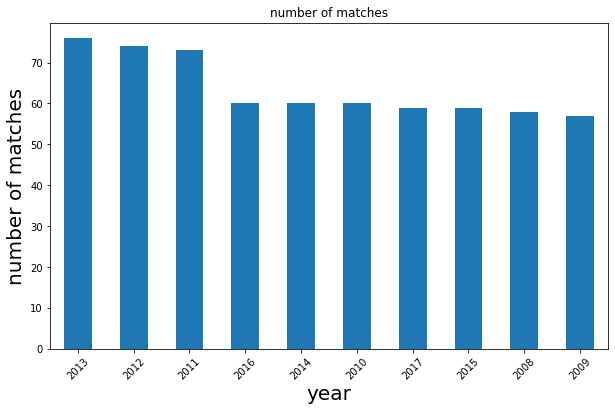

In [86]:
plt.subplots(figsize=(10,6))
data.plot.bar(rot=45)
plt.title('number of matches')
plt.xlabel('year',fontsize=20)
plt.ylabel('number of matches',fontsize=20)
plt.show()

we can clearly infer that 2013 had most number of matches

### 8.Which IPL Team is more successful?

In [78]:
matches['winner'].value_counts().head(1)

Mumbai Indians    92
Name: winner, dtype: int64

In [88]:
successful=matches['winner'].value_counts().sort_values(ascending=True)

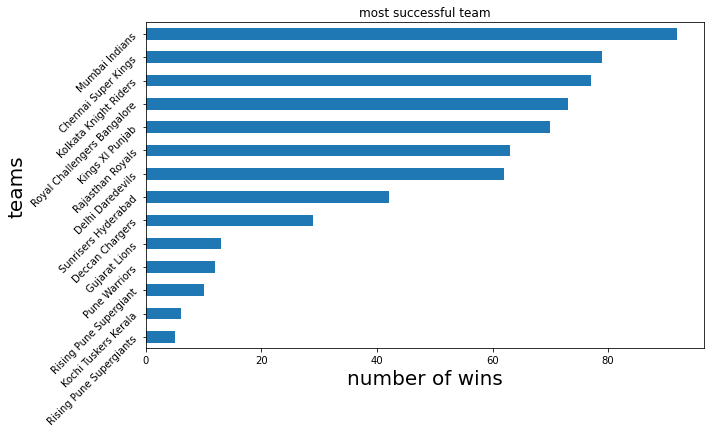

In [91]:
plt.subplots(figsize=(10,6))
successful.plot.barh(rot=45)
plt.title('most successful team')
plt.xlabel('number of wins',fontsize=20)
plt.ylabel('teams',fontsize=20)
plt.show()

from the above we can clearly infer that Mumbai Indians had most number of wins throughout all the seasons.

### 9.Has Toss-winning helped in winning matches?

In [9]:
round((matches[matches['toss_winner']==matches['winner']]['id'].count()/matches['id'].count())*100,3)

51.101

toss winning has helped 51.1% of the times for the teams to win the match .